# Perbandingan Klasifikasi Data Mutu Padi Organik dengan Metode K-Neirest Neighbors, Decision Tree C4.5, dan Naive Bayes

ditujukan untuk memenuhi proyek akhir data mining 
yang di susun oleh :
1. Zaidan Nabil Diwangkara (H1D020034)
2. Nabila Eka Maharani (H1D020038)
3. Ali Murtadho (H1D020054)

In [1]:
# Proses pengimporan library Machine Learning
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_excel('Data Mutu Padi Organik.xls')

## Proses Preprocessing Data

pada bagian preprocessing data ini terdapat 3 sesi :
1. Seleksi Data
2. Pembersihan Data
3. Transformasi Data

In [3]:
df = pd.read_excel('Data Mutu Padi Organik.xls', skiprows=2) #Skiprows digunakan untuk mengskip naik ke 2 baris atas yang kososng
df = df.drop(0) #Pembuangan data yang bernilai kosong

#Penghapusan variabel yang tidak diperlukan untuk klasifikasi, yaitu No dan teknik
df.drop('No.', axis=1, inplace=True) 
df.drop('teknik', axis=1, inplace=True)
df.head()

,Variates,P.,B.,Warna,rasa,Musim,Penyakit,PH,Grade Mutu
1,panda wangi,6.3,1.2,putih,sangat pulen,Hujan,Burung,2.0,Grade D
2,ciheran,7.2,2.3,putih,pulen,Hujan,penggerek batang,2.0,Grade C
3,mi kongga,6.1,3.3,putih,sangat pulen,Hujan,wereng coklat,2.0,Grade D
4,IR 64,6.1,4.2,putih,pulen,Hujan,wereng hijau,2.0,Grade B
5,Beras Merah,7.3,5.1,merah,sangat pulen,Hujan,tikus,2.0,Grade C


In [4]:
#Proses pengecekan jumlah data sekaligus menyeleksi data yang akan dilabelkan dan ditargetkan
df['Variates'].value_counts()
df['Warna'].value_counts()
df['rasa'].value_counts()
df['Musim'].value_counts()
df['Penyakit'].value_counts()
df['Grade Mutu'].value_counts()

Grade C    2392
Grade B    1609
Grade D     869
Grade A      82
Name: Grade Mutu, dtype: int64

In [5]:
#Proses Transformasi Data menggunakan Label Encoder dari library scikit learn
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Variates'] = enc.fit_transform(df['Variates'].values)
df['Warna'] = enc.fit_transform(df['Warna'].values)
df['rasa'] = enc.fit_transform(df['rasa'].values)
df['Musim'] = enc.fit_transform(df['Musim'].values)
df['Grade Mutu'] = enc.fit_transform(df['Grade Mutu'].values)
df['Penyakit'] = enc.fit_transform(df['Penyakit'].values)
df.head()

,Variates,P.,B.,Warna,rasa,Musim,Penyakit,PH,Grade Mutu
1,5,6.3,1.2,3,1,0,0,2.0,3
2,3,7.2,2.3,3,0,0,1,2.0,2
3,4,6.1,3.3,3,1,0,3,2.0,3
4,2,6.1,4.2,3,0,0,4,2.0,1
5,1,7.3,5.1,2,1,0,2,2.0,2


In [6]:
df.info() #proses pengecekan tipe data yang baru ditransformasi 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4952 entries, 1 to 4952
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Variates    4952 non-null   int32  
 1   P.          4952 non-null   float64
 2   B.          4952 non-null   float64
 3   Warna       4952 non-null   int32  
 4   rasa        4952 non-null   int32  
 5   Musim       4952 non-null   int32  
 6   Penyakit    4952 non-null   int32  
 7   PH          4952 non-null   float64
 8   Grade Mutu  4952 non-null   int32  
dtypes: float64(3), int32(6)
memory usage: 270.8 KB


In [7]:
#Proses Penyeleksian data yang akan dijadikan label dan target label
x = df.iloc[:,:8]
y = df.iloc[:,-1]

In [8]:
#Proses Transformasi nilai variabel ke dalam skala dengan menggunakan min max scaler (range 0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xscaled = scaler.fit_transform(x)
xscaled

array([[1.        , 0.16666667, 0.01851852, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.66666667, 0.22222222, ..., 0.        , 0.25      ,
        0.        ],
       [0.8       , 0.05555556, 0.40740741, ..., 0.        , 0.75      ,
        0.        ],
       ...,
       [0.        , 0.77777778, 0.94444444, ..., 0.        , 0.5       ,
        0.        ],
       [1.        , 0.11111111, 0.01851852, ..., 1.        , 0.        ,
        0.33333333],
       [0.6       , 0.22222222, 0.22222222, ..., 1.        , 0.25      ,
        0.33333333]])

In [9]:
# Persiapan Proses Klasifikasi dengan persiapan data train dan data testing
from sklearn.model_selection import train_test_split

#MinMaxScaler
xtrains, xtests, ytrains, ytests = train_test_split(xscaled, y, test_size = 0.9, random_state = 0)

#StandardScaler
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.9, random_state = 0)


In [12]:


from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
xtrainn = sc.fit_transform(xtrain)
xtestt = sc.fit_transform(xtest)

In [13]:
#Menghitung banyaknya data train dan data testing
print("xtrain: ", len(xtrains))
print("xtest: ", len(xtests))
print("ytrain: ", len(ytrains))
print("ytest: ", len(ytests))

xtrain:  495
xtest:  4457
ytrain:  495
ytest:  4457


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Klasifikasi K-Neirest Neighbors

In [15]:
#Min Max Scaler
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3).fit(xtrains, ytrains)

#StandardScaler
from sklearn.neighbors import KNeighborsClassifier
KNNSC = KNeighborsClassifier(n_neighbors=3).fit(xtrainn, ytrain)

In [16]:
#Klasifikasi Report data
print("KLASIFIKASI REPORT KNN DENGAN MINMAXSCALER")
ypred = KNN.predict(xtests)
cm = confusion_matrix(ytests, ypred)
KNNscore = KNN.score(xtests, ytests)
prec = precision_score(ytests, ypred, average='macro')
rec = recall_score(ytests, ypred, average='macro')
fs = f1_score(ytests, ypred, average='macro')
akurasi = classification_report(ytests, ypred)
print("Confussion matrix")
print(cm)
print("Tingkat Akurasi Algoritma KNN")
print("Akurasi :", akurasi)
akurasi = accuracy_score(ytests, ypred)
print("Score: ", KNNscore)
print(f"Tingkat Akurasi %d persen" %(akurasi*100))
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", fs)
print("\n")
print("========================================================================")
print("KLASIFIKASI REPORT KNN DENGAN STANDARD SCALER")
ypred1 = KNNSC.predict(xtestt)
cm1 = confusion_matrix(ytest, ypred1)
KNNscore = KNNSC.score(xtestt, ytest)
prec1 = precision_score(ytest, ypred1, average='macro')
rec1 = recall_score(ytest, ypred1, average='macro')
fs1 = f1_score(ytest, ypred1, average='macro')
akurasi2 = classification_report(ytest, ypred1)
print("Confussion matrix")
print(cm)
print("Tingkat Akurasi Algoritma KNN")
print("Akurasi :", akurasi2)
akurasi2 = accuracy_score(ytest, ypred1)
print("Score: ", KNNscore)
print(f"Tingkat Akurasi %d persen" %(akurasi2*100))
print("Precision: ", prec1)
print("Recall: ", rec1)
print("F1 Score: ", fs1)

KLASIFIKASI REPORT KNN DENGAN MINMAXSCALER
Confussion matrix
[[  36   39    0    0]
 [  45 1238  139   28]
 [   0  123 1958   74]
 [   0   38   53  686]]
Tingkat Akurasi Algoritma KNN
Akurasi :               precision    recall  f1-score   support

           0       0.44      0.48      0.46        75
           1       0.86      0.85      0.86      1450
           2       0.91      0.91      0.91      2155
           3       0.87      0.88      0.88       777

    accuracy                           0.88      4457
   macro avg       0.77      0.78      0.78      4457
weighted avg       0.88      0.88      0.88      4457

Score:  0.8790666367511779
Tingkat Akurasi 87 persen
Precision:  0.7716546090207755
Recall:  0.7813151682765251
F1 Score:  0.7762991128990976


KLASIFIKASI REPORT KNN DENGAN STANDARD SCALER
Confussion matrix
[[  36   39    0    0]
 [  45 1238  139   28]
 [   0  123 1958   74]
 [   0   38   53  686]]
Tingkat Akurasi Algoritma KNN
Akurasi :               precision    rec

[0.9620821180166031, 0.9115997307606013, 0.8790666367511779, 0.8292573479919229, 0.8153466457258245, 0.8142248148979134, 0.8086156607583577, 0.7866277765312991, 0.7471393313888266]


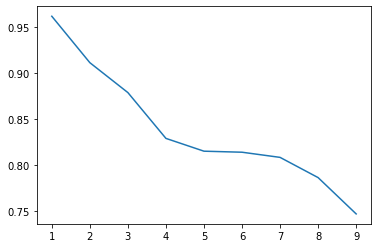

In [24]:
#Proses penentuan K terbaik
k = np.arange(1,10)
bestk = []
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i).fit(xtrains, ytrains)
    KNNscore = KNN.score(xtests, ytests)
    bestk.append(KNNscore)
print(bestk)

import matplotlib.pyplot as plt
plt.plot(k, bestk)
plt.show()

## Klasifikasi Decision Tree C4.5

In [17]:
from sklearn.tree import DecisionTreeClassifier

#Min Max Scaler
dtc = DecisionTreeClassifier().fit(xtrains, ytrains)


#StandardScaler
dtcsc = DecisionTreeClassifier().fit(xtrainn, ytrain)

In [18]:
print("KLASIFIKASI REPORT DATA C4.5 DENGAN MINMAXSCALER")
ypc = dtc.predict(xtests)
cmm = confusion_matrix(ytests, ypc)
ascore = dtc.score(xtests, ytests)
akurasi = classification_report(ytests, ypc)
precis = precision_score(ytests, ypc, average='macro')
recal = recall_score(ytests, ypc, average='macro')
fs1c = f1_score(ytests, ypc, average='macro')
akurasi = classification_report(ytests, ypc)
print("Confussion matrix = cm")
print(cmm)
print("\n")
print("Tingkat Akurasi Algoritma C4.5")
print("Akurasi :", akurasi)
akurasi = accuracy_score(ytests, ypc)
print("Score: ", ascore)
print("Tingkat Akurasi %d persen" %(akurasi*100))
print("Precision: ", precis)
print("Recall: ", recal)
print("F1 Score: ", fs1c)
print("========================================================================")
print("KLASIFIKASI REPORT DATA C4.5 DENGAN STANDARDSCALER")
ypcsc = dtcsc.predict(xtestt)
cmm1 = confusion_matrix(ytest, ypcsc)
ascore1 = dtcsc.score(xtestt, ytest)
akurasi1 = classification_report(ytest, ypcsc)
precis1 = precision_score(ytest, ypcsc, average='macro')
recal1 = recall_score(ytest, ypcsc, average='macro')
fs1c1 = f1_score(ytest, ypcsc, average='macro')
akurasi1 = classification_report(ytest, ypcsc)

print("Confussion matrix = cm")
print(cmm1)
print("\n")
print("Tingkat Akurasi Algoritma C4.5")
print("Akurasi :", akurasi1)
akurasi1 = accuracy_score(ytest, ypcsc)
print("Score: ", ascore1)
print("Tingkat Akurasi %d persen" %(akurasi1*100))
print("Precision: ", precis1)
print("Recall: ", recal1)
print("F1 Score: ", fs1c1)

KLASIFIKASI REPORT DATA C4.5 DENGAN MINMAXSCALER
Confussion matrix = cm
[[  75    0    0    0]
 [   0 1408   42    0]
 [   0   16 2122   17]
 [   0    1    0  776]]


Tingkat Akurasi Algoritma C4.5
Akurasi :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       0.99      0.97      0.98      1450
           2       0.98      0.98      0.98      2155
           3       0.98      1.00      0.99       777

    accuracy                           0.98      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.98      0.98      0.98      4457

Score:  0.9829481714157505
Tingkat Akurasi 98 persen
Precision:  0.9868060234628313
Recall:  0.9886085641034037
F1 Score:  0.9876620404748451
KLASIFIKASI REPORT DATA C4.5 DENGAN STANDARDSCALER
Confussion matrix = cm
[[  75    0    0    0]
 [   0 1412   38    0]
 [   0   20 2118   17]
 [   0    1    0  776]]


Tingkat Akurasi Algoritma C4.5
Akurasi :      

## Klasifikasi Naive Bayes

In [19]:
#Min Max Scaler
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(xtrains, ytrains)

#StandardScaler
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB().fit(xtrainn, ytrain)

In [20]:
print("KLASIFIKASI REPORT DATA NAIVE BAYES DENGAN MINMAXSCALER ")
ypnb = nb.predict(xtests)
cmnb = confusion_matrix(ytests, ypnb)
nbscore = nb.score(xtests, ytests)
preci = precision_score(ytests, ypnb, average='macro')
reca = recall_score(ytests, ypnb, average='macro')
fs1 = f1_score(ytests, ypnb, average='macro')
akurasi = classification_report(ytests, ypnb)
print("Confusion Matrix")
print(cmnb)
print("\n")
print("Tingkat Akurasi Algoritma Naive Bayes")
print("Akurasi :", akurasi)
akurasi = accuracy_score(ytests, ypnb)
print("Score: ", nbscore)
print(f"Tingkat Akurasi %d persen" %(akurasi*100))
print("Precision: ", preci)
print("Recall: ", reca)
print("F1 Score: ", fs1)
print("=================================================================")
print("KLASIFIKASI REPORT DATA NAIVE BAYES DENGAN STANDARDSCALER ")
ypnb1 = nb1.predict(xtestt)
cmnb1 = confusion_matrix(ytest, ypnb1)
nbscore1 = nb1.score(xtestt, ytest)
preci1 = precision_score(ytest, ypnb1, average='macro')
reca1 = recall_score(ytest, ypnb1, average='macro')
fs11 = f1_score(ytest, ypnb1, average='macro')
akurasi = classification_report(ytest, ypnb1)
print("Confusion Matrix")
print(cmnb1)
print("\n")
print("Tingkat Akurasi Algoritma Naive Bayes")
print("Akurasi :", akurasi)
akurasi = accuracy_score(ytest, ypnb1)
print("Score: ", nbscore1)
print(f"Tingkat Akurasi %d persen" %(akurasi*100))
print("Precision: ", preci1)
print("Recall: ", reca1)
print("F1 Score: ", fs11)

KLASIFIKASI REPORT DATA NAIVE BAYES DENGAN MINMAXSCALER 
Confusion Matrix
[[  75    0    0    0]
 [ 116  539  165  630]
 [   0  115  855 1185]
 [   0    0    1  776]]


Tingkat Akurasi Algoritma Naive Bayes
Akurasi :               precision    recall  f1-score   support

           0       0.39      1.00      0.56        75
           1       0.82      0.37      0.51      1450
           2       0.84      0.40      0.54      2155
           3       0.30      1.00      0.46       777

    accuracy                           0.50      4457
   macro avg       0.59      0.69      0.52      4457
weighted avg       0.73      0.50      0.52      4457

Score:  0.5037020417321068
Tingkat Akurasi 50 persen
Precision:  0.5884354353499489
Recall:  0.691797219195811
F1 Score:  0.5188719720179136
KLASIFIKASI REPORT DATA NAIVE BAYES DENGAN STANDARDSCALER 
Confusion Matrix
[[   0   75    0    0]
 [   0 1150  300    0]
 [   0  294 1861    0]
 [   0  105  672    0]]


Tingkat Akurasi Algoritma Naive Baye

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:12